##  1. Комплексные числа в Питоне

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('e^z = {:.3f}'.format(numpy.exp(z)))

z =  (3+3j)
e^z = -19.885+2.834j


In [21]:
print((2.75+3.6981j)*(8.55-6.13*1j))

(46.181853000000004+14.761255000000006j)


In [22]:
import numpy
print(1.4 * numpy.exp(5.32*1j))

(0.799270785858235-1.1494199453957457j)


## 2. Фигуры, созданные при помощи формулы Жуковского

In [23]:
def Zhuk(z, c = 1):
    return z + (c**2)/z

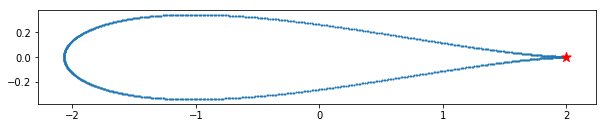

In [84]:
c = 1
r = 1.5
xc = -.15
yc = 0
R = ((c-xc)**2 + yc**2)**0.5
theta = numpy.linspace(0, 2*numpy.pi, 1000)
x = R * numpy.cos(theta) + xc
y = R * numpy.sin(theta) + yc
z = x + 1j*y

plt.figure(figsize=(10,5))
plt.axes(aspect="equal")
plt.scatter(Zhuk(z, c).real, Zhuk(z, c).imag, s=1)

z_point = 1 + 0*1j
plt.scatter(Zhuk(z_point, c).real, Zhuk(z_point, c).imag, color='red', marker='*',
              s=100)

## 3. Расчетная сетка в плоскости  $z$ в полярной системе координат

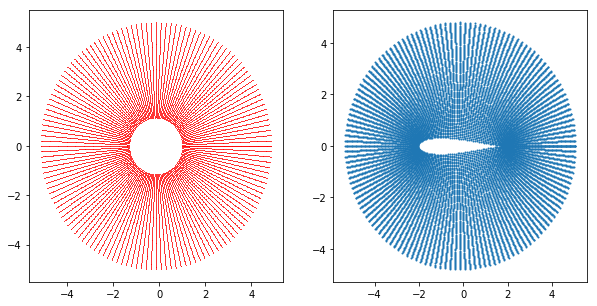

In [85]:
fi_start, fi_end = 0, np.pi*2
r_start, r_end = 1.15, 5
r = np.linspace(r_start, r_end, 100)
fi = np.linspace(fi_start, fi_end, 145)

R, Fi = np.meshgrid(r, fi)
X = R*np.cos(Fi) - 0.15
Y = R*np.sin(Fi)
Z = X + Y*1j


figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.scatter(X, Y, s=1, color='red', marker='o', linewidth=0)
ax2.scatter(Zhuk(Z).real,Zhuk(Z).imag, s=1)

## 4. Обтекание симметричного профиля Жуковского под нулевым углом атаки

In [86]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*np.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*np.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v
def get_stream_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*np.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [87]:
u_inf = 1

x_doublet, y_doublet = -0.15, 0.0
kappa = 2*np.pi*1.15**2

u_freestream = u_inf * np.ones((145, 100), dtype=float)
v_freestream = np.zeros((145, 100), dtype=float)

psi_freestream = u_inf * Y


psi_doublet = get_stream_doublet(kappa, x_doublet, y_doublet, X, Y)

psi = psi_freestream + psi_doublet

u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

u = u_freestream + u_doublet
v = v_freestream + v_doublet

Ksi = Zhuk(X+Y*1j)

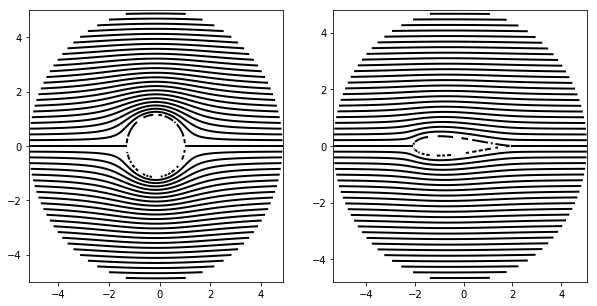

In [88]:
figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.contour(X, Y, psi, 51, colors='k', linewidths=2, linestyles='solid')
ax2.contour(Ksi.real, Ksi.imag, psi, 51, colors='k', linewidths=2, linestyles='solid')

In [89]:
W =(u - v*1j)/(1-1/Z**2)

### Векторы скорости и коэффициент давления

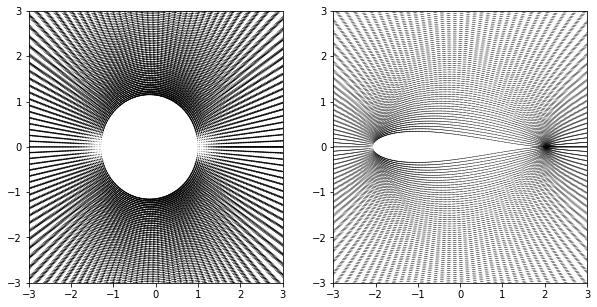

In [90]:
figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.quiver(X,Y, u, v, scale=50)

ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.quiver(Ksi.real,Ksi.imag, W.real, -W.imag, scale=60, headlength = 10)

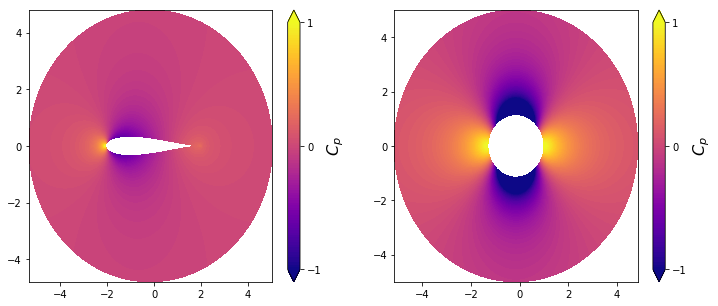

In [91]:
## профиль 
cp1 = 1.0 - (W.real**2+W.imag**2)/u_inf**2

## цилинидр 
cp2 = 1.0 - (u**2+v**2)/u_inf**2


figure, m_axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = m_axs

contf1 = ax1.contourf(Ksi.real,Ksi.imag, cp1, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf1, ax=ax1)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

contf2 = ax2.contourf(X,Y, cp2, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf2, ax=ax2)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

## 5. Обтекание симметричного профиля Жуковского под ненулевым углом атаки, без циркуляции

In [92]:
fi = -20*np.pi/180
nX = (X + 0.15) * np.cos(fi) + Y * np.sin(fi) - 0.15
nY = -(X + 0.15) * np.sin(fi) + Y * np.cos(fi)

nZ = nX + 1j * nY

nKsi = Zhuk(nX+nY*1j)
# nXc = (Ksi.real - Zhuk(0.15).real) * np.cos(fi) + Ksi.imag * np.sin(fi)
# nYc = -(Ksi.real - Zhuk(0.15).real) * np.sin(fi) + Ksi.imag * np.cos(fi)

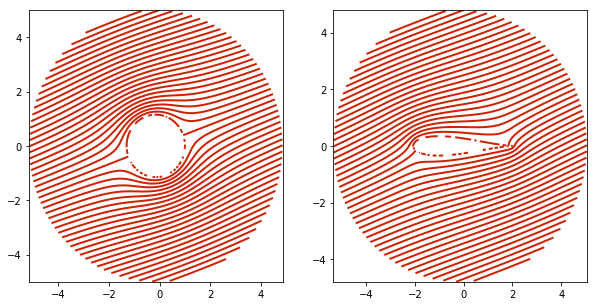

In [93]:
figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.contour(nX, nY, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid')
ax2.contour(nKsi.real, nKsi.imag, psi, 51, colors='#CD2305', linewidths=2, linestyles='solid')

In [94]:
nWu = (u - 1j*v) * np.e**(1j*fi)
nW = (nWu)/(1-1/nZ**2)

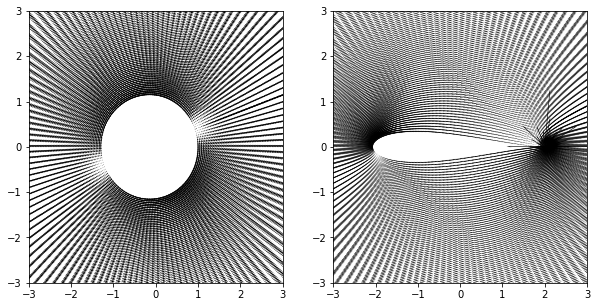

In [100]:
figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.quiver(nX,nY, nWu.real, -nWu.imag, scale=50)

ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.quiver(nKsi.real,nKsi.imag, nW.real, -nW.imag, scale=40, headlength=10)

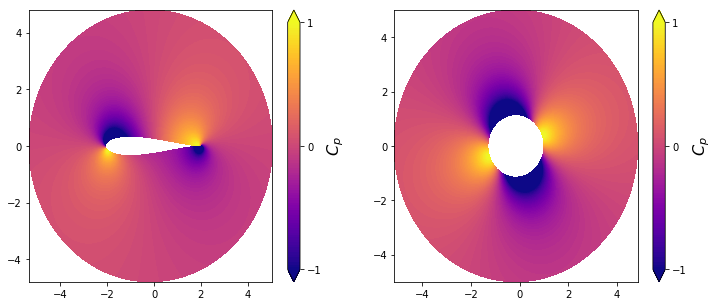

In [105]:
ncp1 = 1.0 - (nW.real**2+nW.imag**2)/u_inf**2

ncp2 = ncp = 1.0 - (nWu.real**2+nWu.imag**2)/u_inf**2



figure, m_axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = m_axs

contf1 = ax1.contourf(nKsi.real, nKsi.imag, ncp1, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf1, ax=ax1)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

contf2 = ax2.contourf(nX, nY, ncp2, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf2, ax=ax2)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

## 6. Обтекание симметричного профиля Жуковского под ненулевым углом атаки при наличии циркуляции

In [108]:
gamma = -4*np.pi*np.sin(fi)*1.15

In [109]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return psi

In [110]:
u_vortex, v_vortex = get_velocity_vortex(gamma, -0.15, 0, nX, nY)
psi_vortex = get_stream_function_vortex(gamma, -0.15, 0, nX, nY)

In [114]:
nu_vu = nWu.real + u_vortex
nv_vu = - nWu.imag + v_vortex
psi_v = psi + psi_vortex

nW_v = (nu_vu - 1j * nv_vu)/(1-1/nZ**2)

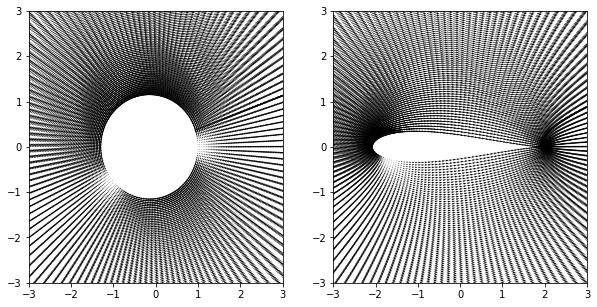

In [115]:
figure, m_axs = plt.subplots(1, 2, figsize=(10,5))
ax1, ax2 = m_axs

ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.quiver(nX,nY, nu_vu, nv_vu, scale=50)

ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.quiver(nKsi.real,nKsi.imag, nW_v.real, -nW_v.imag, scale=50)

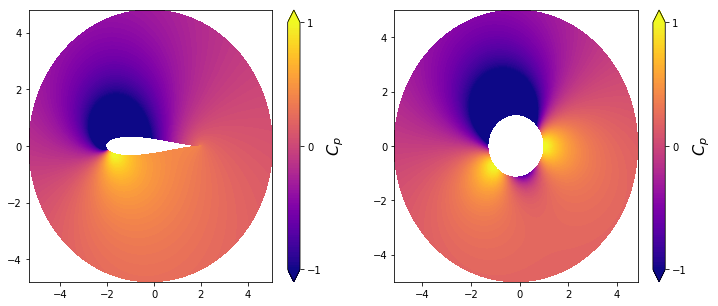

In [116]:
ncp_v_p = 1.0 - (nW_v.real**2+nW_v.imag**2)/u_inf**2

ncp_v = 1.0 - (nu_vu**2+nv_vu**2)/u_inf**2



figure, m_axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = m_axs

contf1 = ax1.contourf(nKsi.real, nKsi.imag, ncp_v_p, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf1, ax=ax1)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

contf2 = ax2.contourf(nX, nY, ncp_v, levels=np.linspace(-1.0, 1.0, 100),\
                        extend='both', cmap='plasma')
cbar = figure.colorbar(contf2, ax=ax2)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, 0.0, 1.0])

In [128]:
dots_X = r_start*np.cos(fi) - 0.15
dots_Y = r_start*np.sin(fi)

print(round(dots_X,3))

0.931


### Подъемная сила

In [127]:
fi_s = np.linspace(0, 2 * np.pi, 145)
F_x = 0
F_y = 0
print(round(fi, 3))
for i in range (0, 145 // 2 + 1):
    F_y += (nKsi.real[i + 1][0] - nKsi.real[i][0]) * (ncp_v_p[i][0] + ncp_v_p[i + 1][0] - ncp_v_p[-i][0] - ncp_v_p[- i - 1][0]) / 2
    F_x += (nKsi.imag[i + 1][0] - nKsi.imag[i][0]) * (ncp_v_p[i][0] + ncp_v_p[i + 1][0] + ncp_v_p[-i][0] + ncp_v_p[- i - 1][0]) / 2
    
print('F_x = {:.3f}'.format((F_x * np.cos(-fi) - F_y * np.sin(-fi))/2))
print('F_y = {:.3f}'.format((-F_x * np.sin(-fi) + F_y * np.cos(-fi))/2))

-0.349
F_x = -0.034
F_y = 3.563
